# Adult Census Income

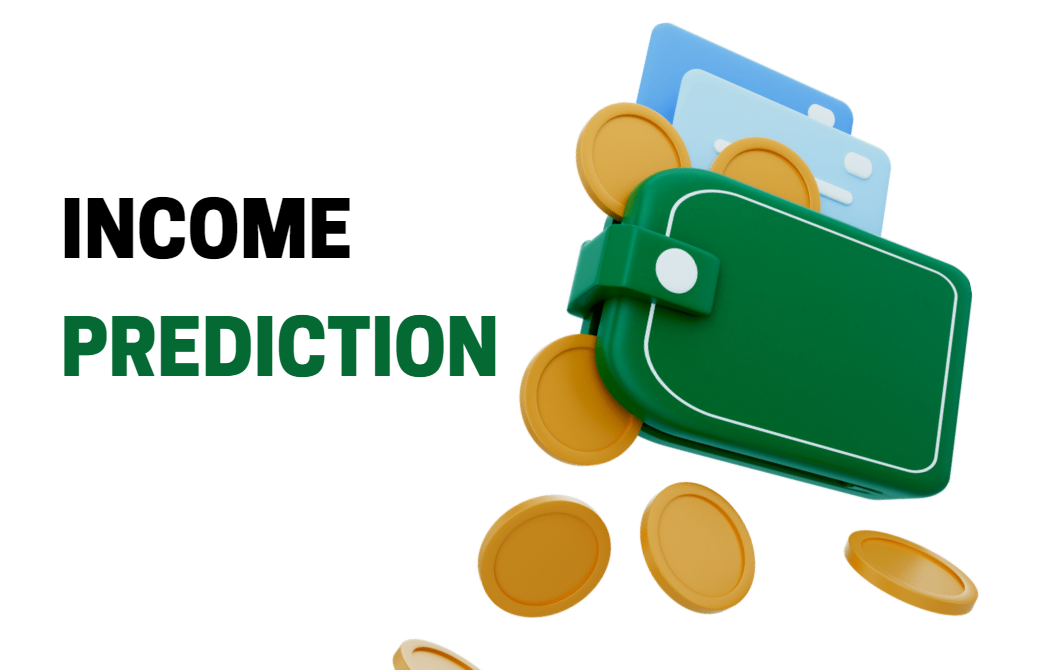

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
from six.moves import urllib
warnings.filterwarnings("ignore")
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import preprocessing
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import plotly.express as px
from sklearn import metrics
import bz2,pickle
import pymongo
import setup
from pickle import dump
import category_encoders as ce

# Importing Dataset

In [15]:
census_df = pd.read_csv(r'I:\ML\adult.csv')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Data Exploration and Visualization

In [3]:
rows,columns=census_df.shape
print(f"Number of Observations in adult dataset:Rows->{rows} Columns->{columns}")

Number of Observations in adult dataset:Rows->32561 Columns->15


In [18]:
census_df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [19]:
census_df.tail()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32560,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [60]:
census_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education.num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital.gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital.loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours.per.week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


In [59]:
census_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [16]:
# define numerical & categorical columns
numeric_features = [feature for feature in census_df.columns if census_df[feature].dtype != 'O']
categorical_features = [feature for feature in census_df.columns if census_df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 6 numerical features : ['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week']

We have 9 categorical features : ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country', 'income']


In [5]:
#check the value counts of each column and look for any weirdness
for col in categorical_features:
    print('----------------------------------')
    print(col)
    print('----------------------------------')
    total= census_df[col].value_counts()
    percentage = census_df[col].value_counts(normalize=True)
    df = pd.concat([total,percentage],keys = ['total','percentage'],axis = 1)
    print(df)
    print('\n')
    

----------------------------------
workclass
----------------------------------
                  total  percentage
Private           22696    0.697030
Self-emp-not-inc   2541    0.078038
Local-gov          2093    0.064279
?                  1836    0.056386
State-gov          1298    0.039864
Self-emp-inc       1116    0.034274
Federal-gov         960    0.029483
Without-pay          14    0.000430
Never-worked          7    0.000215


----------------------------------
education
----------------------------------
              total  percentage
HS-grad       10501    0.322502
Some-college   7291    0.223918
Bachelors      5355    0.164461
Masters        1723    0.052916
Assoc-voc      1382    0.042443
11th           1175    0.036086
Assoc-acdm     1067    0.032769
10th            933    0.028654
7th-8th         646    0.019840
Prof-school     576    0.017690
9th             514    0.015786
12th            433    0.013298
Doctorate       413    0.012684
5th-6th         333    0.01022

# Observations

In [ ]:
#Native.Country, Occupation, Workclass
has unknown values represented by ?

#Education
9th, 10th, 11th, 12th comes under HighSchool Grad but it has mentioned separately
Create Elementary_Middle_school object for 1st-4th, 5th-6th, 7th-8th
Also create Associate object for Assoc-acdm and Assoc-voc

#Marital Status
Married-civ-spouse,Married-spouse-absent,Married-AF-spouse comes under category Married
Divorced, separated again comes under category separated.

#Workclass
Self-emp-not-inc, Self-emp-inc comes under category self employed
Local-gov,State-gov,Federal-gov comes under category goverment emloyees
No income,Never-worked comes under category Without-pay

#Native country
except  United-States separated all other countries under other category 

# Data Cleaning

In [17]:
# Check if ? is present
uncleaned_cols = ['native.country','occupation','workclass']
for col in uncleaned_cols:
    print(f"? in {col}: {census_df[col].isin(['?']).sum()}")

? in native.country: 583
? in occupation: 1843
? in workclass: 1836


In [18]:
# Replace ? with NAN
for col in uncleaned_cols:
    census_df[col].replace('?', np.nan , inplace=True)

In [19]:
# Check if ? is present
for col in uncleaned_cols:
    print(f"? in {col}: {census_df[col].isin(['?']).sum()}")

? in native.country: 0
? in occupation: 0
? in workclass: 0


In [55]:
def printinfo():
    temp = pd.DataFrame(index=census_df.columns)
    temp['data_type'] = census_df.dtypes
    temp['null_count'] = census_df.isnull().sum()
    temp['unique_count'] = census_df.nunique()
    temp['duplicate_count'] =census_df.duplicated().sum() 
    return temp

In [21]:
printinfo()

,data_type,null_count,unique_count,duplicate_count
age,int64,0,73,24
workclass,object,1836,8,24
fnlwgt,int64,0,21648,24
education,object,0,16,24
education.num,int64,0,16,24
marital.status,object,0,7,24
occupation,object,1843,14,24
relationship,object,0,6,24
race,object,0,5,24
sex,object,0,2,24


In [87]:
# Imputer object using the most_frequent strategy and
# missing_values type for imputation

In [22]:
imp = SimpleImputer(missing_values = np.nan,strategy='most_frequent')
for col in uncleaned_cols:
    census_df[col] = imp.fit_transform(census_df[col].values.reshape(-1, 1) )

In [33]:
printinfo()

,data_type,null_count,unique_count,duplicate_count
age,int64,0,73,25
workclass,object,0,4,25
fnlwgt,int64,0,21648,25
education,object,0,9,25
education.num,int64,0,16,25
marital.status,object,0,4,25
occupation,object,0,14,25
relationship,object,0,6,25
race,object,0,5,25
sex,object,0,2,25


In [24]:
census_df['education'].value_counts()

HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64

# Education

# Elementary school is kindergarten through 5th grade (ages 5-10), middle school is grades 6-8 (ages 11-13), and high school is grades 9-12 (ages 14-18). We offer the resources below to assist you with information on local area public schools and aftercare programs.

In [25]:
census_df['education'] = census_df['education'].apply(lambda x: 'HS-grad' if x == '11th'  or x == '10th' 
                                              or x == '9th' or x == '12th' or x=='HS-grad'
                                              else x)
census_df['education'] = census_df['education'].apply(lambda x: 'Associate' if x == 'Assoc-acdm' or x == 'Assoc-voc' else x)
census_df['education'] = census_df['education'].apply(lambda x: 'Elementary_Middle_school' if x == '1st-4th' 
                                                      or x == '5th-6th' or x == '7th-8th' else x)

In [26]:
census_df['education'].value_counts()

HS-grad                     13556
Some-college                 7291
Bachelors                    5355
Associate                    2449
Masters                      1723
Elementary_Middle_school     1147
Prof-school                   576
Doctorate                     413
Preschool                      51
Name: education, dtype: int64

# Marital.status

In [28]:
married= ['Married-spouse-absent','Married-civ-spouse','Married-AF-spouse']
separated = ['Separated','Divorced']
census_df['marital.status'] = census_df['marital.status'].apply(lambda x: 'Separated' if (x in separated) else x)
census_df['marital.status'] = census_df['marital.status'].apply(lambda x: 'Married' if (x in married) else x)

In [29]:
census_df['marital.status'].value_counts()


Married          15417
Never-married    10683
Separated         5468
Widowed            993
Name: marital.status, dtype: int64

# Workclass

In [31]:
self_employed = ['Self-emp-not-inc','Self-emp-inc']
govt_employees = ['Local-gov','State-gov','Federal-gov']
census_df['workclass'] = census_df['workclass'].apply(lambda x: 'No income' if x == 'Never-worked' or x == 'Without-pay'
                                            else x)
census_df['workclass'] = census_df['workclass'].apply(lambda x: 'Self_employed' if x in self_employed
                                            else x)
census_df['workclass'] = census_df['workclass'].apply(lambda x: 'Govt_employees' if x in govt_employees
                                            else x)


In [32]:
census_df['workclass'].value_counts()

Private           24532
Govt_employees     4351
Self_employed      3657
No income            21
Name: workclass, dtype: int64

# Native country

In [34]:
census_df['native.country'] = census_df['native.country'].apply(lambda x: 'Other' if x != 'United-States' else x)

In [35]:
census_df['native.country'].value_counts()

United-States    29753
Other             2808
Name: native.country, dtype: int64

# drop the duplicate rows in a Dataframe

In [ ]:
duplicate = census_df[census_df.duplicated()]

In [83]:
print(f'Total duplicate values:{census_df.duplicated().sum()}')

Total duplicate values:25


In [87]:
census_df1=census_df.copy()
print(f'Before deletion dataframe size:{census_df1.shape}')

Before deletion dataframe size:(32561, 15)


In [88]:
census_df1.drop_duplicates(keep='first', inplace=True)
print(f'After deletion dataframe size:{census_df1.shape}')
print(f'Total duplicate values after deletion:{census_df1.duplicated().sum()}')

After deletion dataframe size:(32536, 15)
Total duplicate values after deletion:0


In [89]:
census_df1.to_csv('census.csv')

In [2]:
income_census_df = pd.read_csv('census.csv')

In [3]:
#drop unneeded column
income_census_df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [4]:
income_census_df.shape

(32536, 15)

In [5]:
# define numerical & categorical columns
numeric_features = [feature for feature in income_census_df.columns if income_census_df[feature].dtype != 'O']
categorical_features = [feature for feature in income_census_df.columns if income_census_df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 6 numerical features : ['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week']

We have 9 categorical features : ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country', 'income']


# Univariate analysis

The term univariate analysis refers to the analysis of one variable prefix “uni” means “one.” The purpose of univariate analysis is to understand the distribution of values for a single variable.

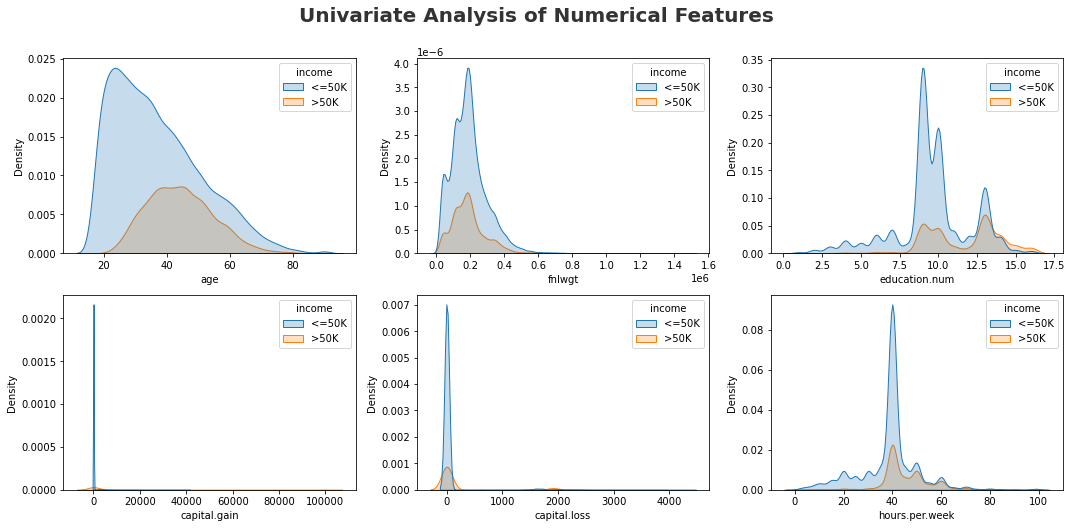

In [17]:
plt.figure(figsize=(15, 20))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numeric_features)):
    plt.subplot(6, 3, i+1)
    sns.kdeplot(x=income_census_df[numeric_features[i]],shade=True, color='b',hue='income',data=income_census_df)
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

# Observations

Our dataset is highly skewed and we should consider scaling it for better performance of our models.

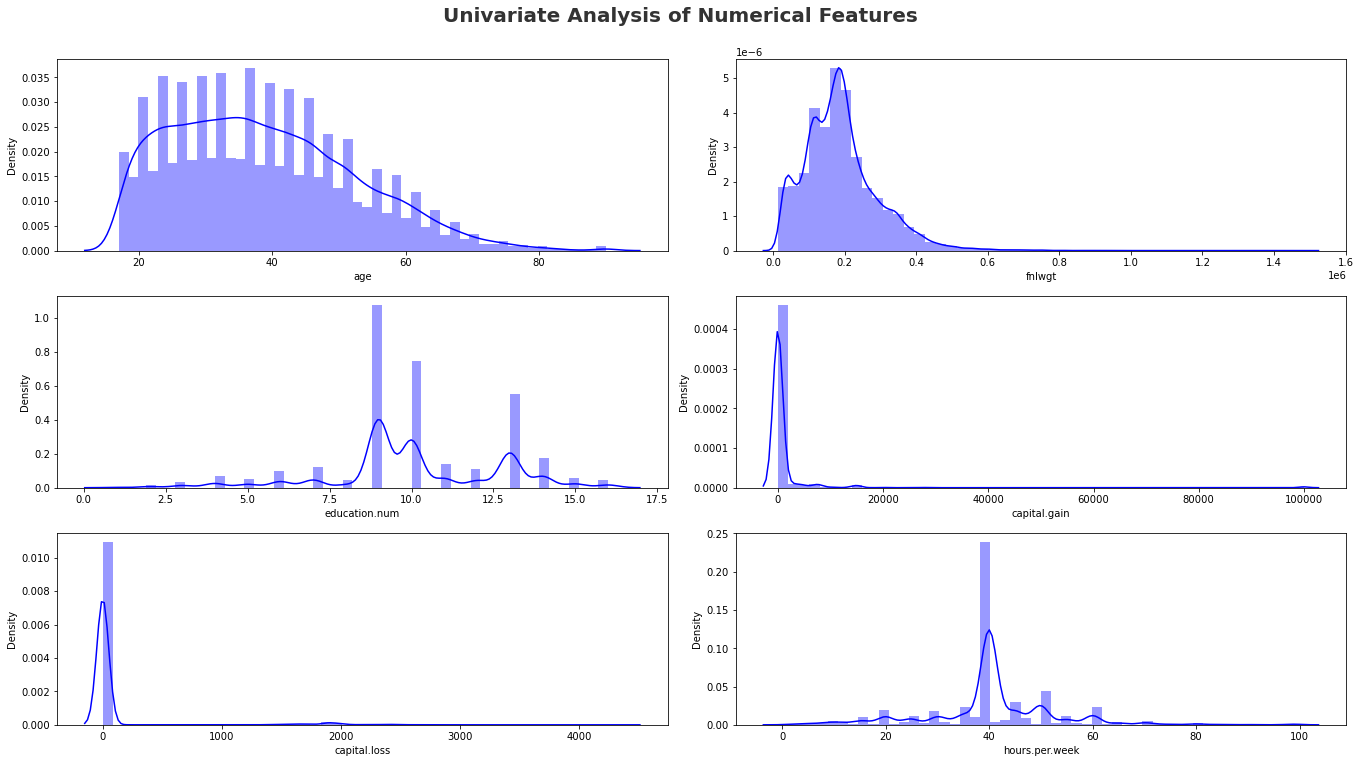

In [30]:
plt.figure(figsize=(19, 20))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numeric_features)):
    plt.subplot(6, 2, i+1)
    sns.distplot(x=income_census_df[numeric_features[i]],kde=True, color="blue")
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

In [ ]:
age: In our dataset People from age group of 18 to 90 can be observed.
hours per week: Generally people can be seen working for 30 hours to 40 hours per week.
education: people above 8th grade are more in our dataset.

In [44]:
# We should make groups of age such that each group contains significant amount of 
# information.
print(len(income_census_df[(income_census_df['age'] > 16) & (income_census_df['age'] <= 25)]))
print(len(income_census_df[(income_census_df['age'] > 25) & (income_census_df['age'] <= 32)]))
print(len(income_census_df[(income_census_df['age'] > 32) & (income_census_df['age'] <= 40)]))
print(len(income_census_df[(income_census_df['age'] > 40) & (income_census_df['age'] <= 50)]))
print(len(income_census_df[(income_census_df['age'] > 50)]))

6399
5874
6827
6977
6459


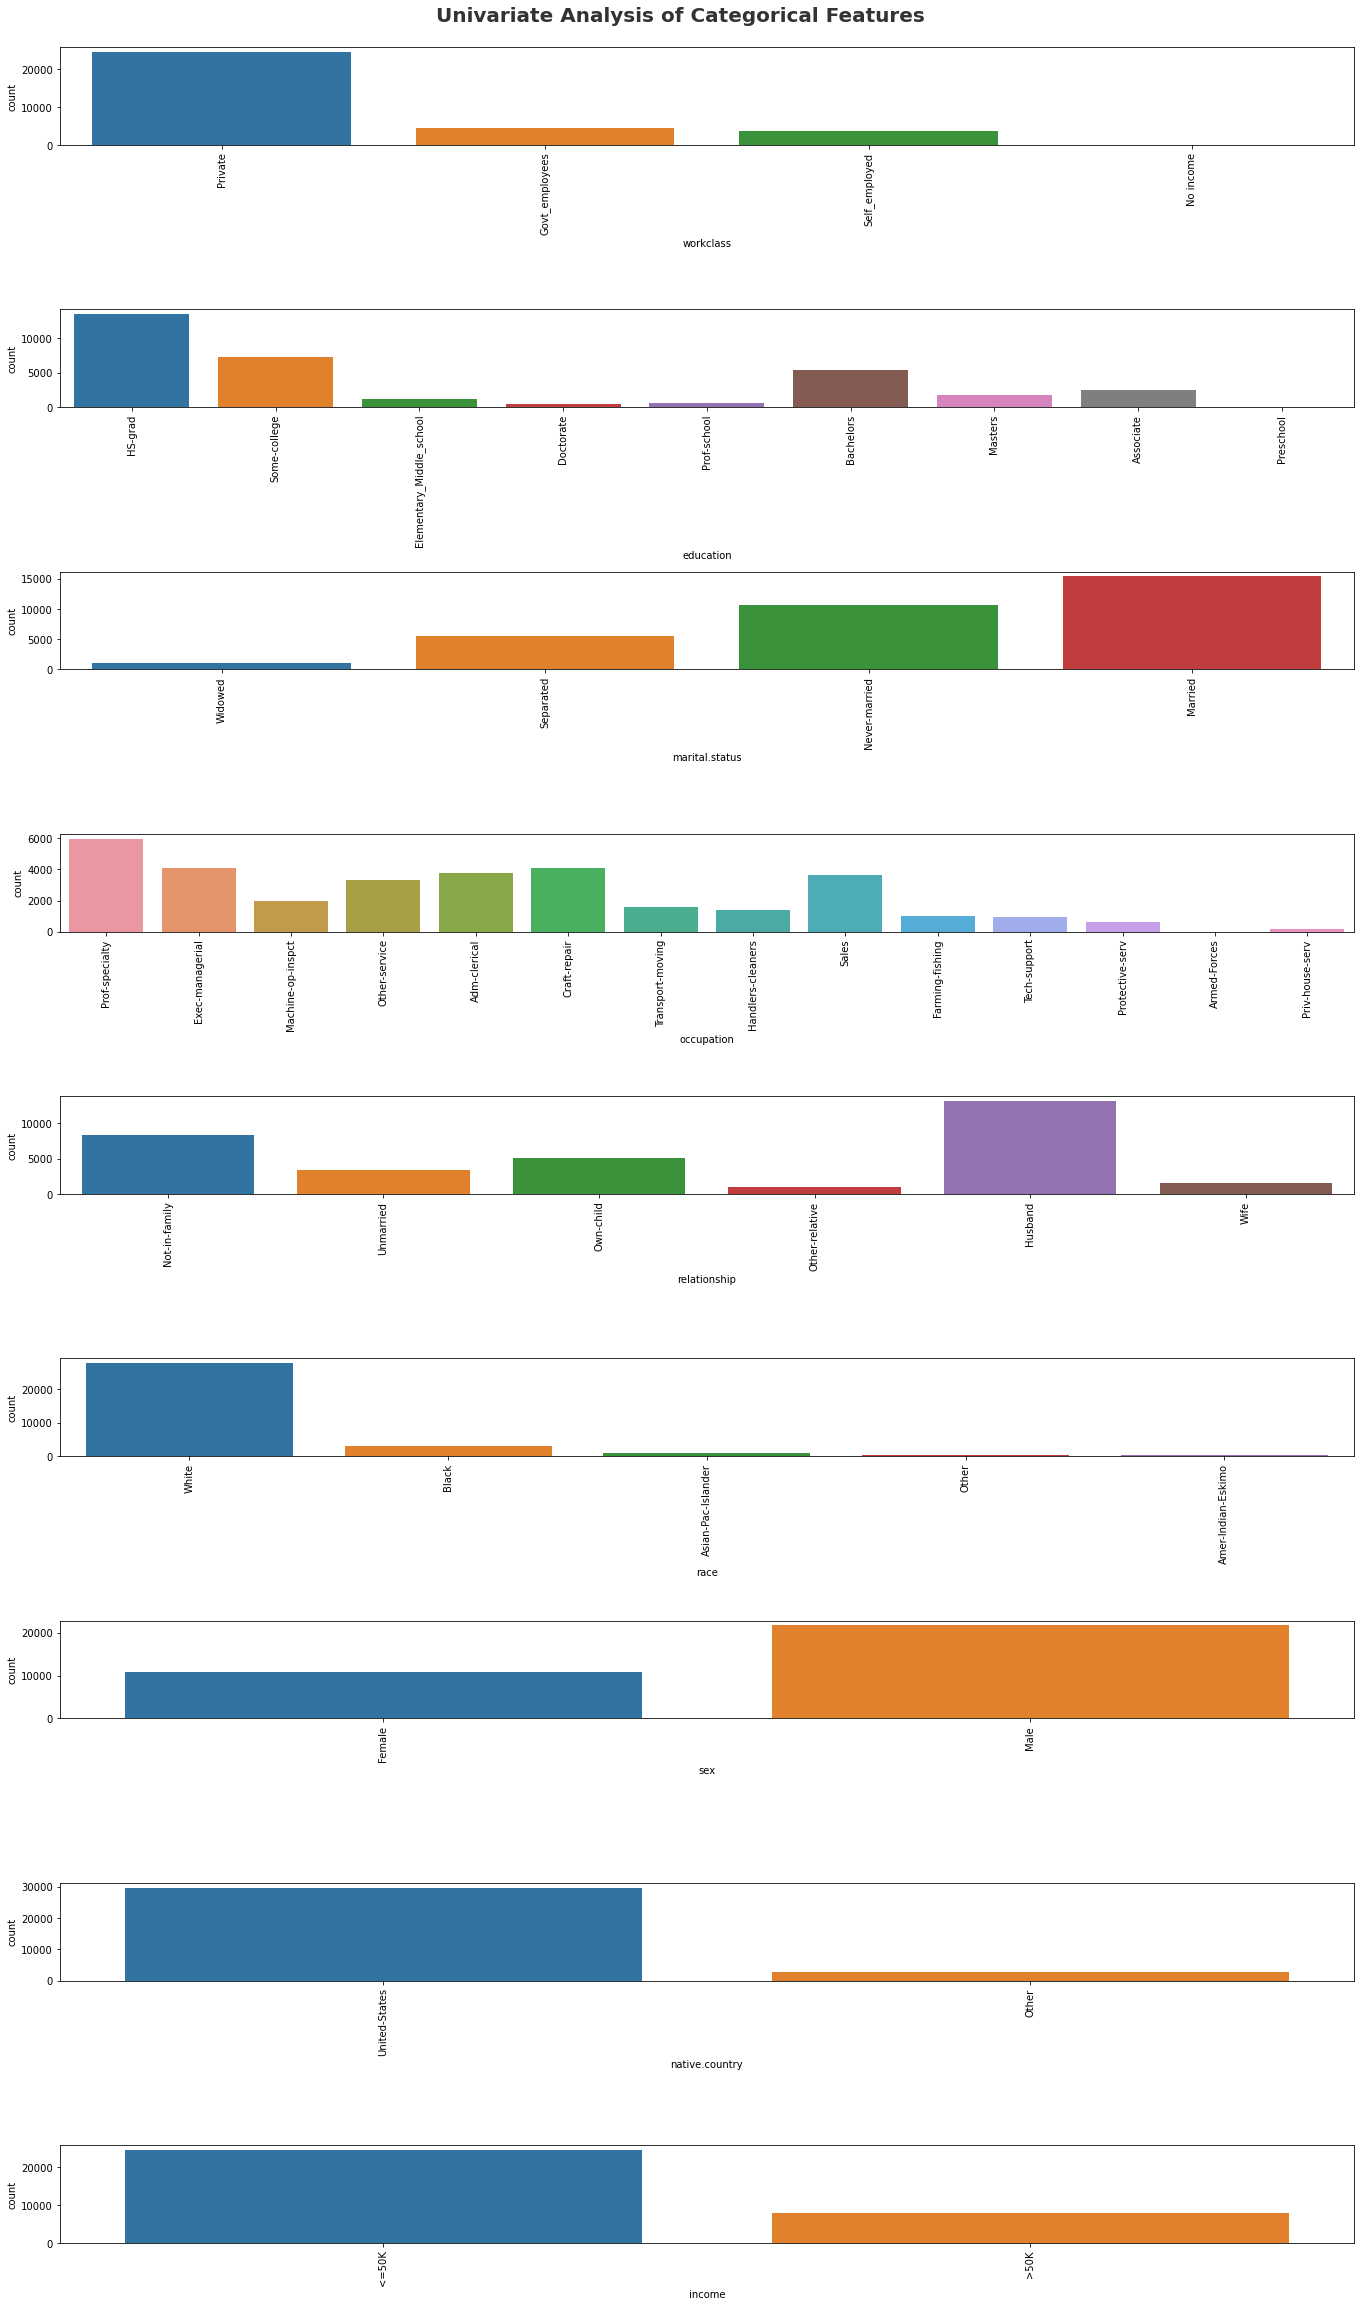

In [53]:
# categorical columns
plt.figure(figsize=(19, 32))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
for i in range(0, len(categorical_features)):
    plt.subplot(9, 1, i+1)
    sns.countplot(x=income_census_df[categorical_features[i]])
    plt.xlabel(categorical_features[i])
    plt.xticks(rotation=90)
    plt.tight_layout()

# Count plot on Income

<AxesSubplot:xlabel='income', ylabel='count'>

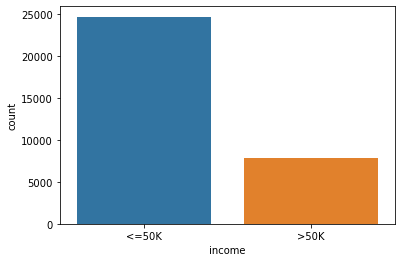

In [54]:
sns.countplot(x='income', data=income_census_df)

# Multivariate Analysis

In [ ]:
Multivariate analysis is the analysis of more than one variable.

# Income Based on categorical features

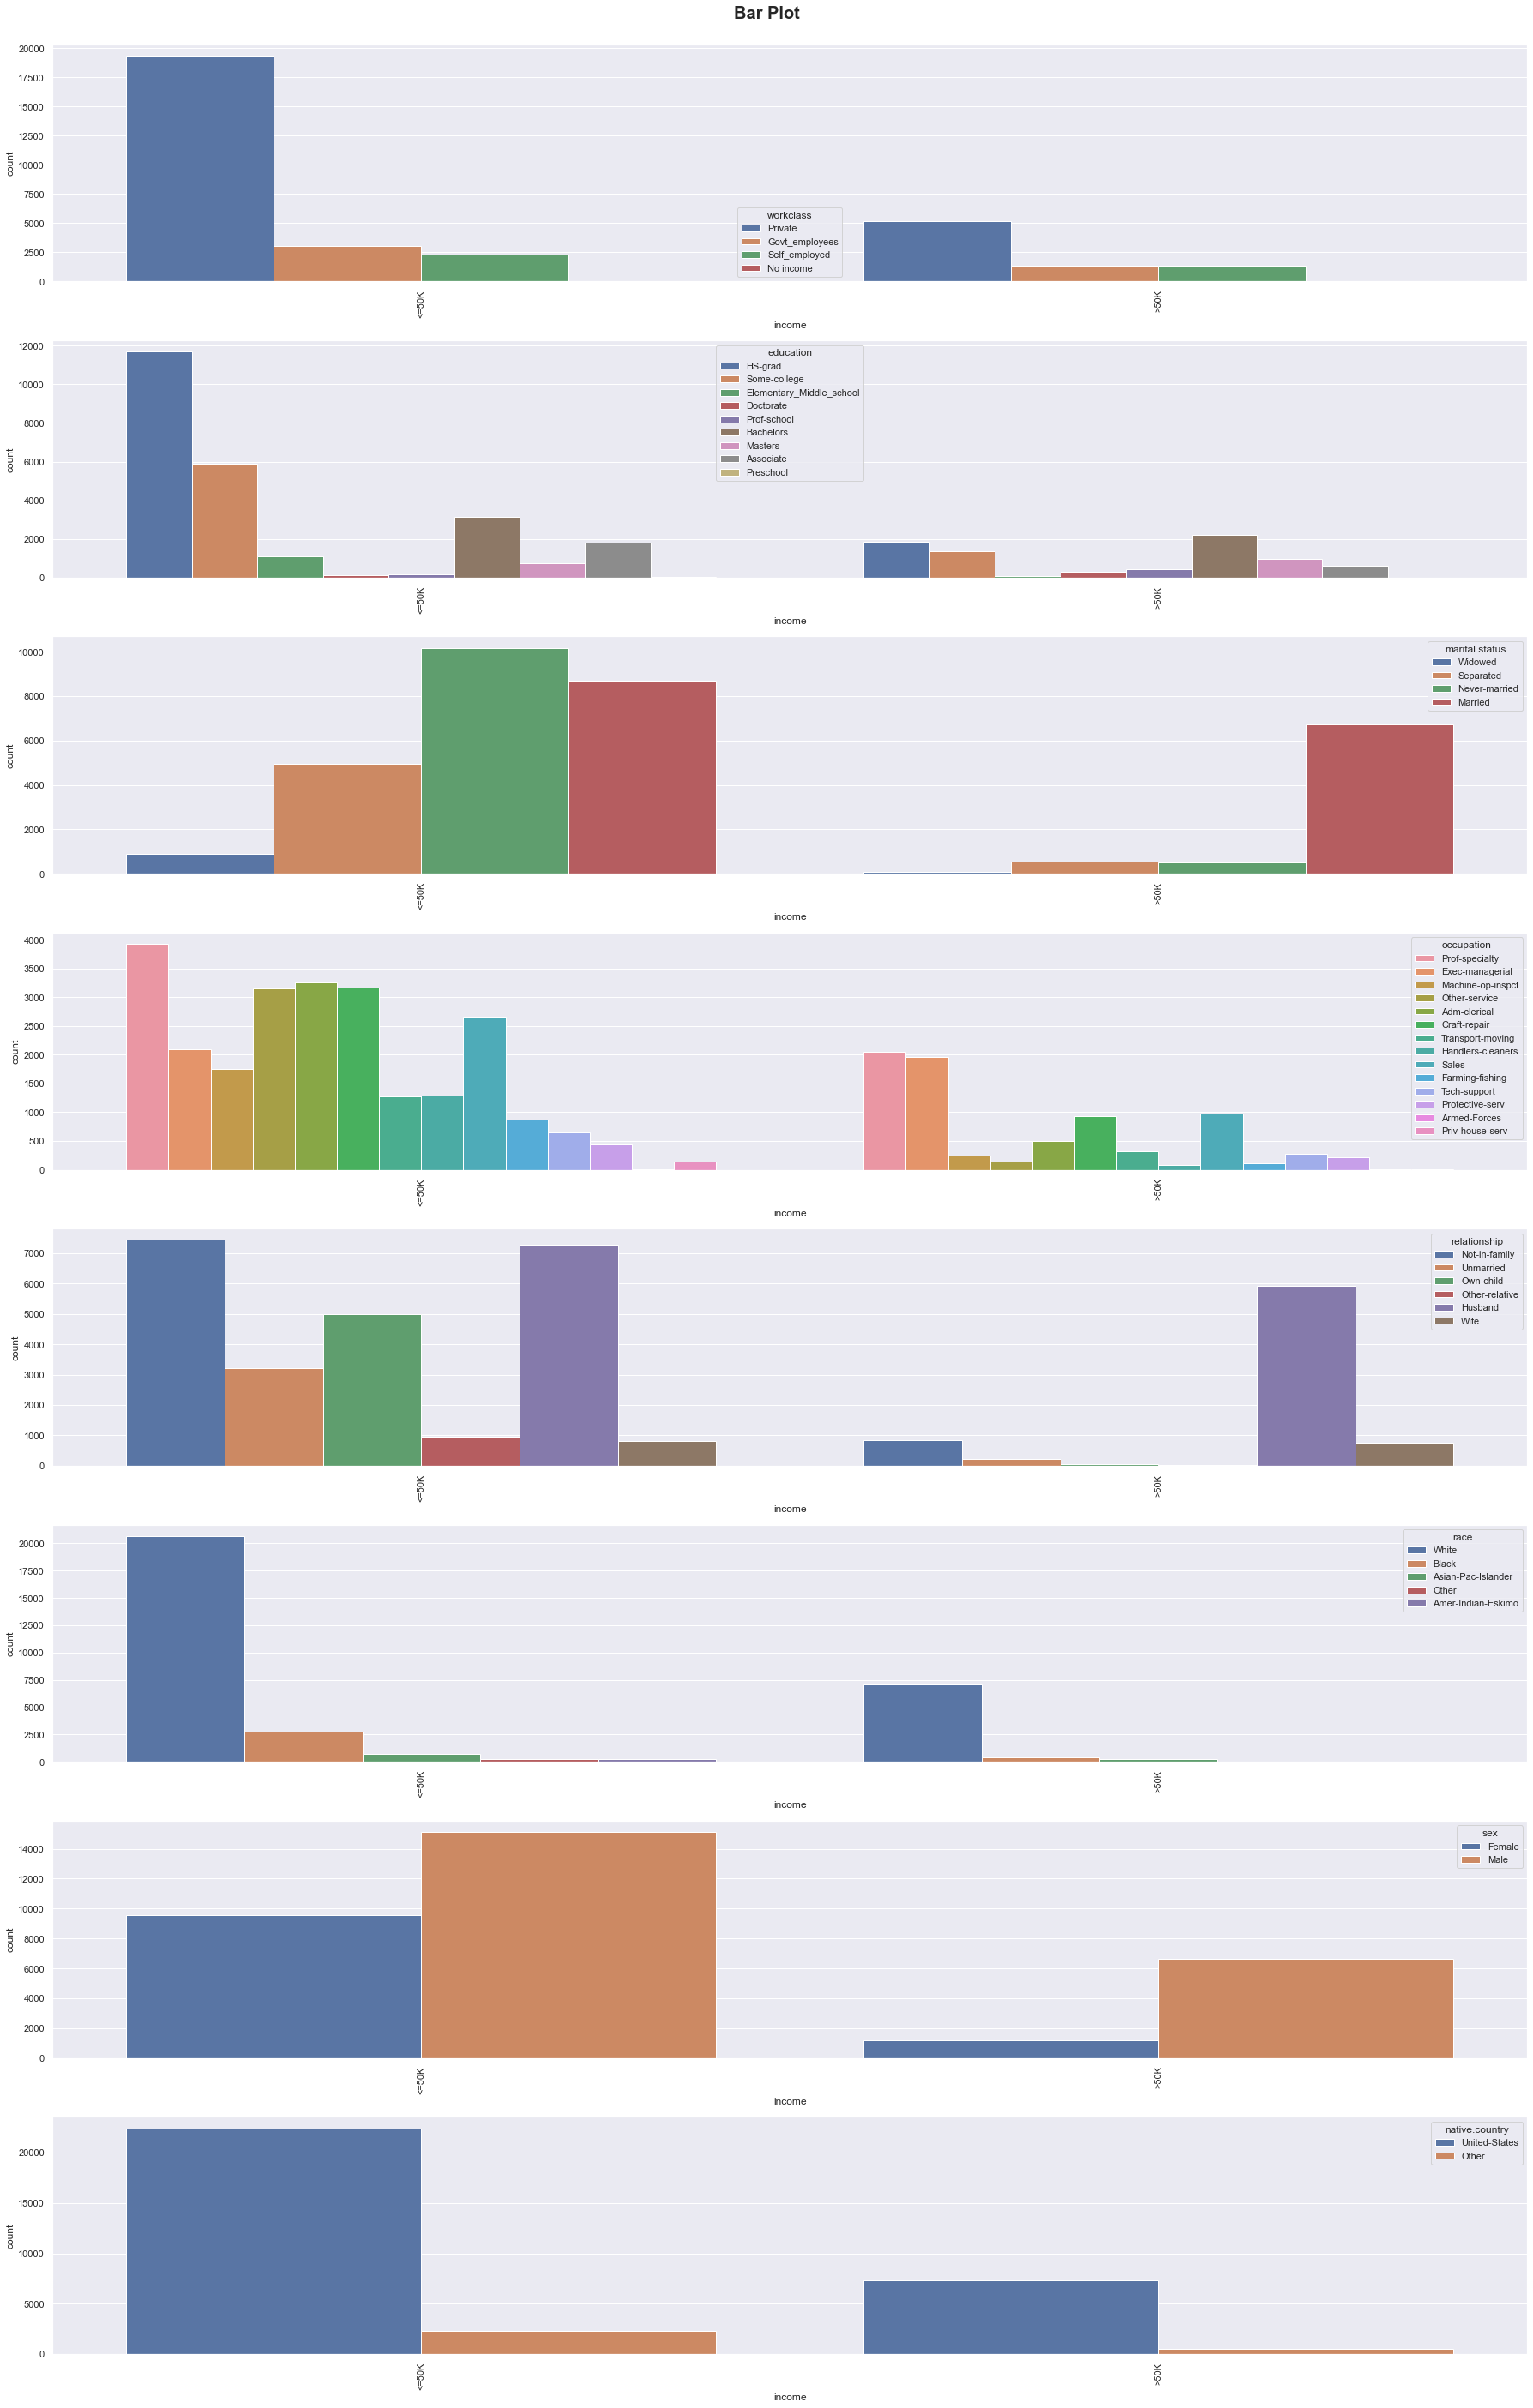

In [84]:
# Bar plot to see the relationship between numerical features and target
plt.figure(figsize=(25, 39))
plt.suptitle('Bar Plot', fontsize=20, fontweight='bold', alpha=1, y=1)
sns.set(style = 'darkgrid', font_scale = 1)
for i in range(0, len(categorical_features)-1):
    plt.subplot(8, 1, i+1)
    #sns.barplot(y='income', x=categorical_features[i], data=income_census_df)
    sns.countplot(x='income', hue=categorical_features[i], data=income_census_df)
    plt.xticks(rotation = 90)
    plt.tight_layout()

In [ ]:
We have to convert the income attribute as a numerial category

In [6]:
income_census_df['income'] = income_census_df['income'].apply(lambda x:x.replace("<=50K", "0"))
income_census_df['income'] = income_census_df['income'].apply(lambda x:x.replace(">50K", "1"))
income_census_df['income'] = income_census_df['income'].astype(int)


In [7]:
categorical_features = [feature for feature in income_census_df.columns if income_census_df[feature].dtype == 'O']

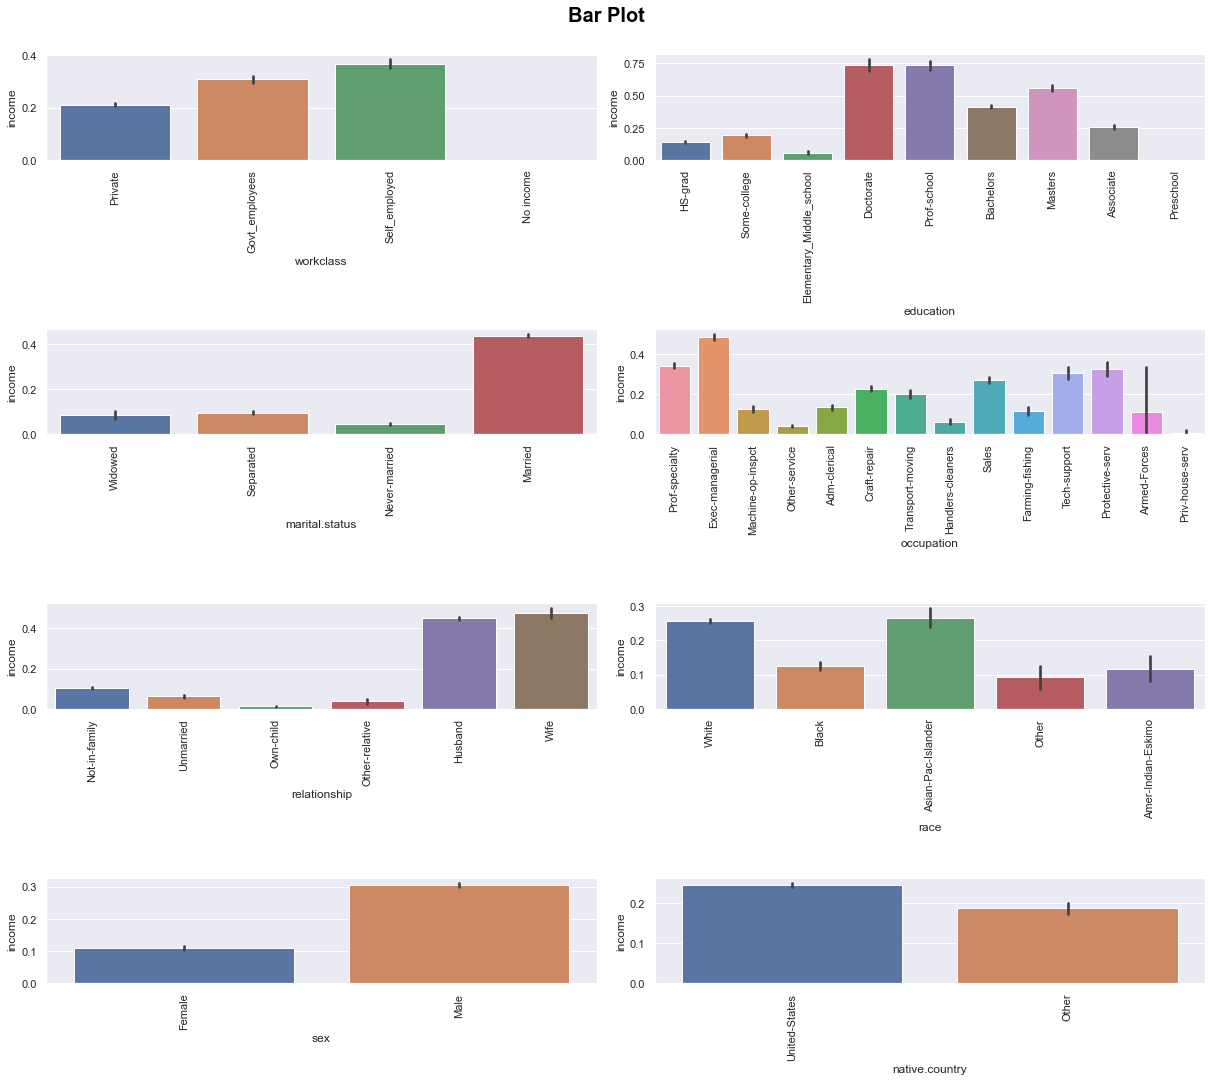

In [50]:
# Bar plot to see the relationship between categorical features and target
plt.figure(figsize=(17, 29))
plt.suptitle('Bar Plot', fontsize=20, fontweight='bold', alpha=1, y=1)
sns.set(style = 'darkgrid', font_scale = 1)
for i in range(0, len(categorical_features)):
    plt.subplot(8, 2, i+1)
    sns.barplot(y='income', x=categorical_features[i], data=income_census_df)
    plt.xticks(rotation = 90)
    plt.tight_layout()

In [8]:
numeric_features = [feature for feature in income_census_df.columns if income_census_df[feature].dtype != 'O']

# Check Multicollinearity in Numerical features

In [43]:
income_census_df[numeric_features].corr()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,income
age,1.000000,-0.076424,0.036224,0.077672,0.057738,0.068515,0.234022
fnlwgt,-0.076424,1.000000,-0.043388,0.000432,-0.010256,-0.018897,-0.009490
education.num,0.036224,-0.043388,1.000000,0.122664,0.079892,0.148422,0.335273
capital.gain,0.077672,0.000432,0.122664,1.000000,-0.031640,0.078407,0.223335
capital.loss,0.057738,-0.010256,0.079892,-0.031640,1.000000,0.054229,0.150498
hours.per.week,0.068515,-0.018897,0.148422,0.078407,0.054229,1.000000,0.229659
income,0.234022,-0.009490,0.335273,0.223335,0.150498,0.229659,1.000000


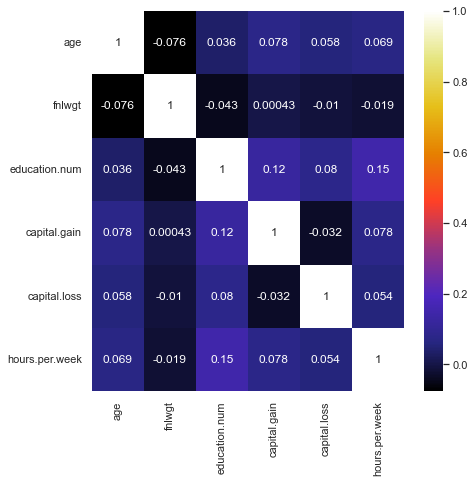

In [87]:
plt.figure(figsize = (7,7))
sns.heatmap(income_census_df.corr(), cmap="CMRmap", annot=True)
plt.show()

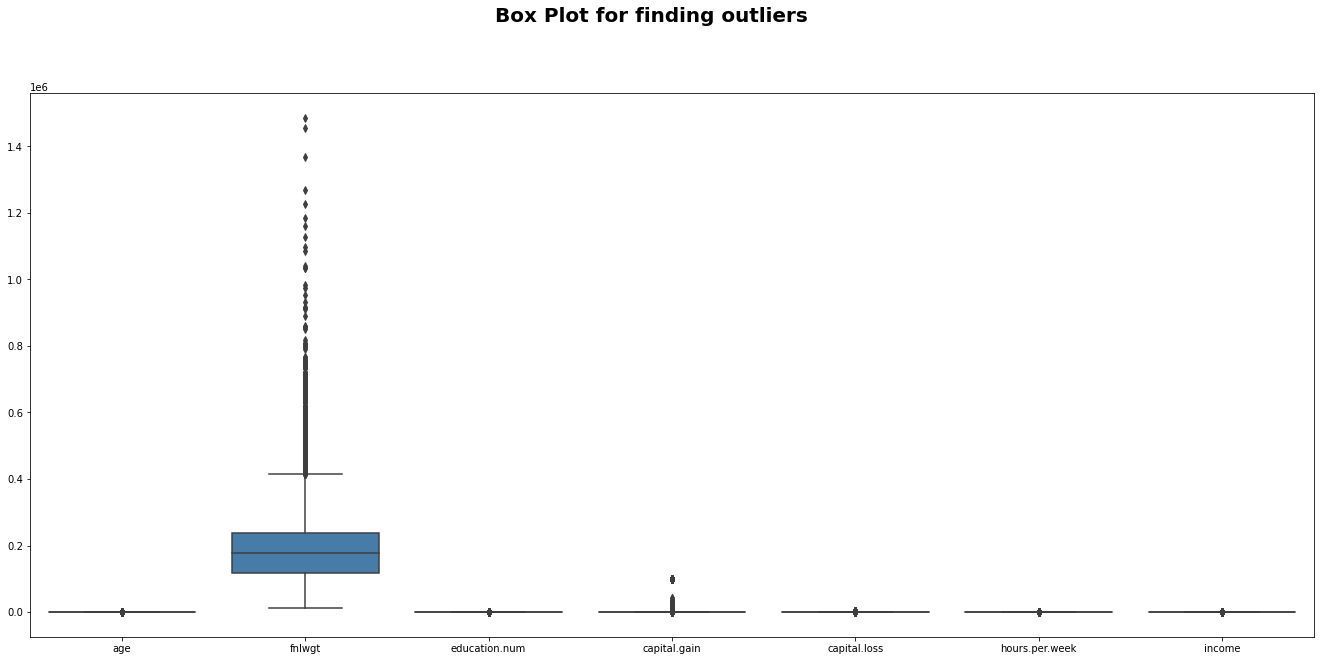

In [9]:
fig = plt.figure( figsize=(23, 10))
plt.suptitle('Box Plot for finding outliers', fontsize=20, fontweight='bold', alpha=1, y=1)
stud_bplt = sns.boxplot(orient='v', data=income_census_df[numeric_features], palette="Set1")
stud_bplt.plot()
plt.show()


# There is a presence of multicollinearity if the value of VIF > 10.

In [10]:
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [11]:
dt = income_census_df[numeric_features]
calc_vif(dt)

,variables,VIF
0,age,7.293790
1,fnlwgt,3.716734
2,education.num,11.205256
3,capital.gain,1.081154
4,capital.loss,1.078272
5,hours.per.week,9.776284
6,income,1.549296


In [12]:
#Deleting education num
income_census_df = income_census_df.drop('education.num', axis = 1)
numeric_features = [col for col in income_census_df.columns if income_census_df[col].dtypes != object]
numeric_features

['age', 'fnlwgt', 'capital.gain', 'capital.loss', 'hours.per.week', 'income']

In [13]:
dt = income_census_df[numeric_features]
calc_vif(dt)

,variables,VIF
0,age,6.219793
1,fnlwgt,3.480288
2,capital.gain,1.080643
3,capital.loss,1.077434
4,hours.per.week,6.917402
5,income,1.519749


In [ ]:
income_census_df.to_csv('final_census.csv')

# Store this dataset into mongodb

In [15]:
income_census_dict = income_census_df.to_dict('records')#convert the dataset in a dictionary form


In [17]:
path=setup.get_mongodb_url()
client = pymongo.MongoClient(path)

# CREATING A DATABASE:
db = client["Adult_Census_Income"]

# CREATING A COLLECTION (TABLE):
user_info_table= db["User_Income_Data"]
user_info_table.insert_many(income_census_dict)


# Splitting of the Data

In [48]:
y = income_census_df['income']
X = income_census_df.drop('income', axis = 1)

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1, test_size = 0.2) 

In [50]:
category_var = [col for col in X.columns if X[col].dtypes == object]
category_var

['workclass',
 'education',
 'marital.status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native.country']

In [51]:
numeric_var = [col for col in X.columns if X[col].dtypes != object]
numeric_var

['age', 'fnlwgt', 'capital.gain', 'capital.loss', 'hours.per.week']

# Feature Scaling

https://www.kaggle.com/code/subinium/11-categorical-encoders-and-benchmark

In [56]:
one_hot = ce.OneHotEncoder(cols = category_var, handle_unknown = 'ignore')

# Creating dataframe for categorical variables which converted to one hot encoded variables.
X_train_one_hot = pd.DataFrame(one_hot.fit_transform(X_train))
X_test_one_hot = pd.DataFrame(one_hot.transform(X_test))


X_train_one_hot.index = X_train.index
X_test_one_hot.index = X_test.index

num_X_train = X_train[numeric_var]
num_X_test = X_test[numeric_var]

# Joining numerical and one hot encoded variables to create our final X_train and X_test.
X_train_new = pd.concat([num_X_train, X_train_one_hot], axis = 1)
X_test_new = pd.concat([num_X_test, X_test_one_hot], axis = 1)


In [57]:
# Scaling our records into standard range of 0 and 1.
scaler = StandardScaler()

X_train_new = scaler.fit_transform(X_train_new)
X_test_new = scaler.transform(X_test_new)

# Logistic Regression

In [58]:
model_logr = LogisticRegression(random_state = 1,solver="liblinear")
model_logr.fit(X_train_new, y_train)
pred_logr = model_logr.predict(X_test_new)
print('Logistic Regression accuracy score:{0:0.2f}%'. format(accuracy_score(y_test, pred_logr)*100))

Logistic Regression accuracy score:85.16%


# SVC

In [60]:
classifier = SVC(random_state = 0,kernel = 'rbf')
classifier.fit(X_train_new, y_train)
#Predicting the Test Set
y_pred = classifier.predict(X_test_new)

In [61]:
print('SVC accuracy score:{0:0.2f}%'. format(accuracy_score(y_test,y_pred)*100))

SVC accuracy score:85.34%


# Save Model and Data Scaler

In [35]:
# save the model
dump(model_logr, open('model_Logistic.pkl', 'wb'))
dump(classifier, open('model_SVC.pkl', 'wb'))
# save the scaler
dump(scaler, open('scaler.pkl', 'wb'))